# Sierra Leone (Bumbuna) - Exploratory Data Analysis

## Overview
This notebook performs comprehensive EDA on solar farm data from Sierra Leone (Bumbuna) to understand data quality, patterns, and relationships that will inform strategic solar investment decisions.

## Objectives
1. Summary Statistics & Missing Value Analysis
2. Outlier Detection & Data Cleaning
3. Time Series Analysis
4. Cleaning Impact Analysis
5. Correlation & Relationship Analysis
6. Wind & Distribution Analysis
7. Temperature & Humidity Analysis
8. Bubble Chart Visualization

## References
- Solar Radiation Measurement Data Standards
- Z-score method for outlier detection (|Z| > 3)
- Time series analysis for solar irradiance patterns


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from datetime import datetime
# Note: plotly is optional and not used in this notebook - using matplotlib/seaborn instead

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

# Set plotting style
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4


In [2]:
# Set working directory to project root
import os

# Change to project root directory (one level up from notebooks/)
current_dir = os.getcwd()
if 'notebooks' in current_dir:
    # If we're in notebooks/, go up one level
    os.chdir('..')
elif not os.path.exists('data'):
    # If data folder not found, try going up one level
    os.chdir('..')

print(f"Current working directory: {os.getcwd()}")

# Load the data
data_path = 'data/sierraleone-bumbuna.csv'
print(f"Loading data from: {os.path.abspath(data_path)}")
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()


Current working directory: d:\My Projects\Kifiya AI Mastery Training
Loading data from: d:\My Projects\Kifiya AI Mastery Training\data\sierraleone-bumbuna.csv
Dataset shape: (525600, 19)

Column names: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']

First few rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as index for time series analysis
df.set_index('Timestamp', inplace=True)

# Basic info about the dataset
print("Dataset Info:")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Total records: {len(df):,}")
print(f"Time span: {(df.index.max() - df.index.min()).days} days")
print(f"\nData types:")
print(df.dtypes)


Dataset Info:
Date range: 2021-10-30 00:01:00 to 2022-10-30 00:00:00
Total records: 525,600
Time span: 364 days

Data types:
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


## 1. Summary Statistics & Missing Value Report


In [4]:
# Summary statistics for all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Summary Statistics for Numeric Columns:")
print("=" * 80)
df[numeric_cols].describe()


Summary Statistics for Numeric Columns:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [5]:
# Missing value analysis
missing_data = df.isna().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
}).sort_values('Missing Percentage', ascending=False)

print("Missing Value Report:")
print("=" * 80)
print(missing_df.to_string(index=False))

# Identify columns with >5% missing values
high_missing = missing_df[missing_df['Missing Percentage'] > 5]
if len(high_missing) > 0:
    print(f"\n⚠️  Columns with >5% missing values:")
    print(high_missing.to_string(index=False))
else:
    print("\n✅ No columns have >5% missing values")


Missing Value Report:
       Column  Missing Count  Missing Percentage
     Comments         525600               100.0
          GHI              0                 0.0
          DNI              0                 0.0
          DHI              0                 0.0
         ModB              0                 0.0
         ModA              0                 0.0
           RH              0                 0.0
           WS              0                 0.0
       WSgust              0                 0.0
         Tamb              0                 0.0
      WSstdev              0                 0.0
           WD              0                 0.0
           BP              0                 0.0
      WDstdev              0                 0.0
     Cleaning              0                 0.0
Precipitation              0                 0.0
        TModA              0                 0.0
        TModB              0                 0.0

⚠️  Columns with >5% missing values:
  Column 

## 2. Outlier Detection & Basic Cleaning


In [6]:
# Key columns for outlier detection
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores for outlier detection
z_scores = {}
outliers = {}

for col in outlier_cols:
    if col in df.columns:
        z_scores[col] = np.abs(stats.zscore(df[col].dropna()))
        outliers[col] = df[z_scores[col] > 3].index.tolist()
        print(f"{col}: {len(outliers[col])} outliers (|Z| > 3)")

# Create a summary of outliers
outlier_summary = pd.DataFrame({
    'Column': outlier_cols,
    'Outlier Count': [len(outliers.get(col, [])) for col in outlier_cols],
    'Outlier Percentage': [len(outliers.get(col, [])) / len(df) * 100 for col in outlier_cols]
})

print("\nOutlier Summary:")
print("=" * 80)
print(outlier_summary.to_string(index=False))


GHI: 2477 outliers (|Z| > 3)
DNI: 7586 outliers (|Z| > 3)
DHI: 2986 outliers (|Z| > 3)
ModA: 1604 outliers (|Z| > 3)
ModB: 2041 outliers (|Z| > 3)
WS: 3967 outliers (|Z| > 3)
WSgust: 3665 outliers (|Z| > 3)

Outlier Summary:
Column  Outlier Count  Outlier Percentage
   GHI           2477            0.471271
   DNI           7586            1.443303
   DHI           2986            0.568113
  ModA           1604            0.305175
  ModB           2041            0.388318
    WS           3967            0.754756
WSgust           3665            0.697298


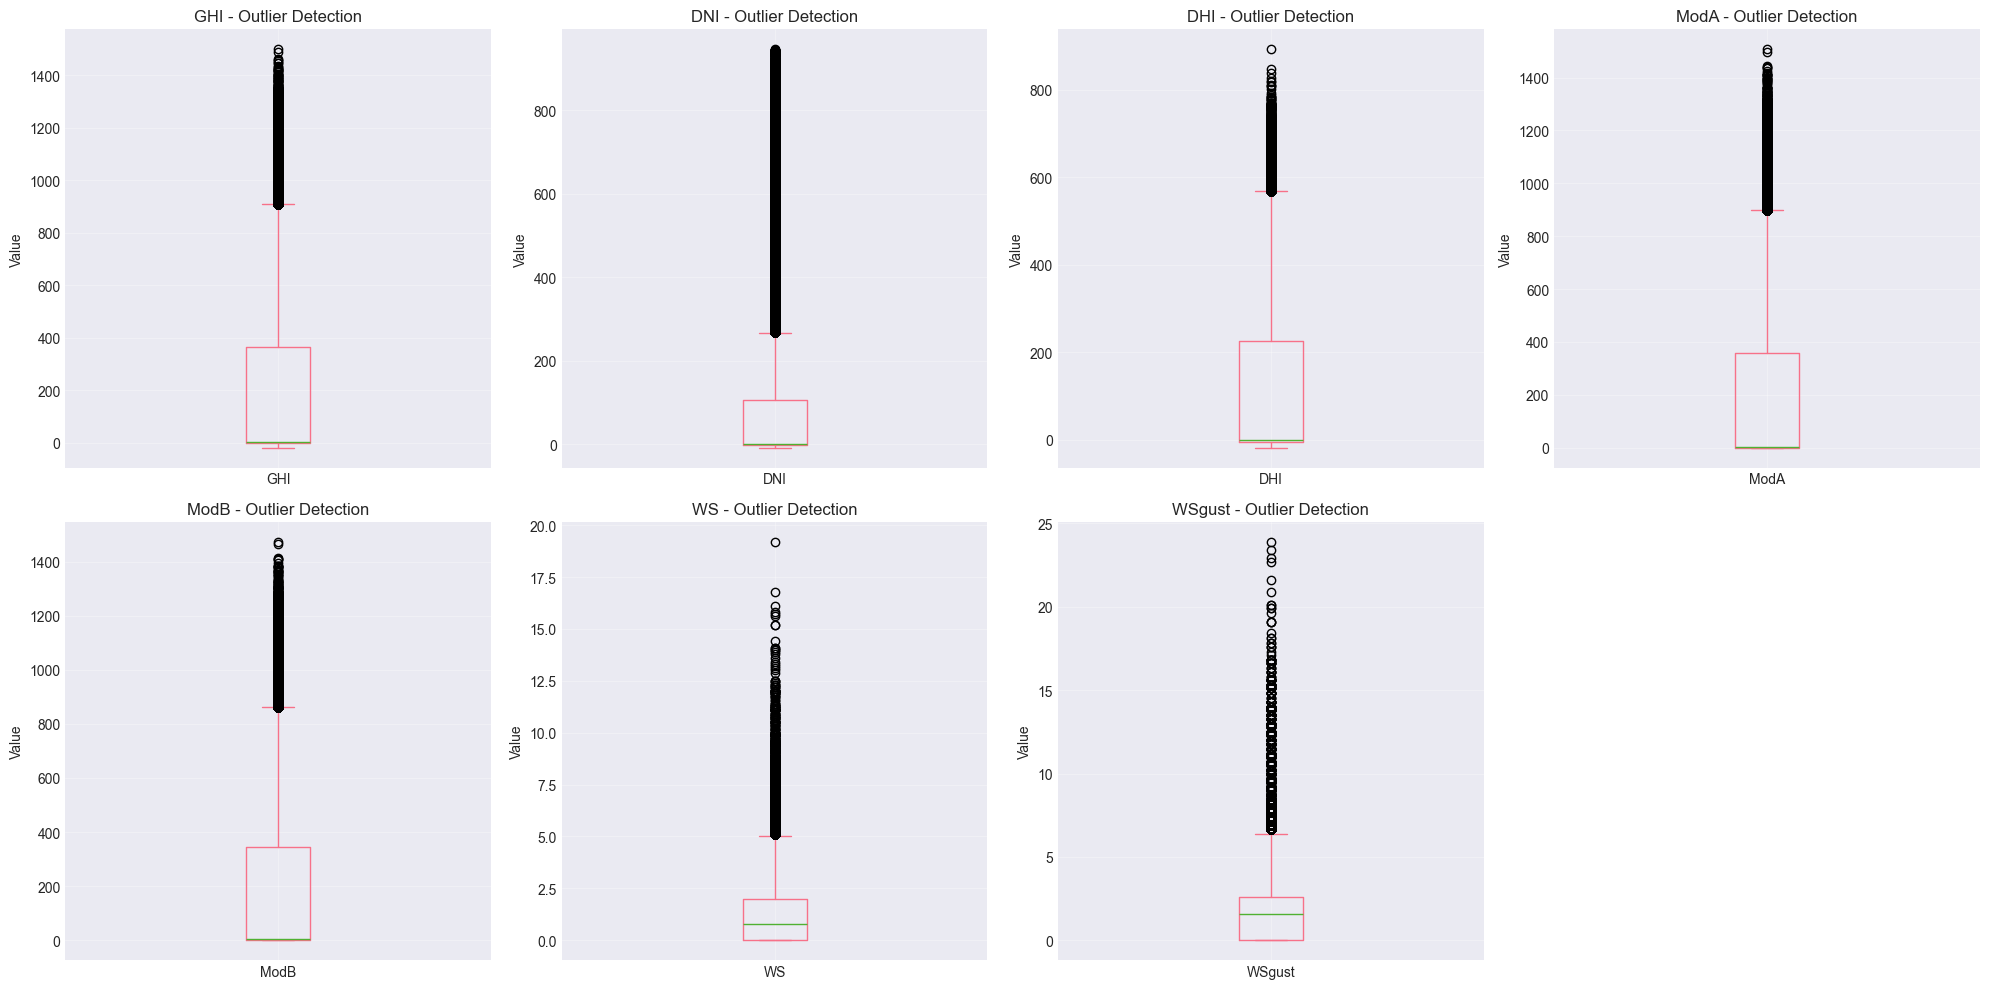

In [7]:
# Visualize outliers using box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(outlier_cols):
    if col in df.columns:
        df[col].plot(kind='box', ax=axes[idx])
        axes[idx].set_title(f'{col} - Outlier Detection')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)

# Remove empty subplots
for idx in range(len(outlier_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [8]:
# Create a copy for cleaning
df_clean = df.copy()

# Flag rows with outliers (|Z| > 3) in key columns
outlier_flags = pd.Series(False, index=df_clean.index)

for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    if col in df_clean.columns:
        z = np.abs(stats.zscore(df_clean[col].dropna()))
        outlier_indices = df_clean[col].dropna().index[z > 3]
        outlier_flags.loc[outlier_indices] = True

print(f"Total rows flagged as outliers: {outlier_flags.sum()}")
print(f"Percentage of outliers: {outlier_flags.sum() / len(df_clean) * 100:.2f}%")

# Option 1: Remove outliers (commented out - we'll use imputation instead)
# df_clean = df_clean[~outlier_flags]

# Option 2: Impute missing values and outliers with median
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP', 'TModA', 'TModB']

for col in key_columns:
    if col in df_clean.columns:
        # Impute missing values with median
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)
        
        # For outliers, we could also impute, but let's keep them for now to analyze patterns
        # Uncomment below to impute outliers with median
        # if col in outlier_cols:
        #     z = np.abs(stats.zscore(df_clean[col]))
        #     df_clean.loc[z > 3, col] = median_value

print("\n✅ Missing values imputed with median")
print(f"Remaining missing values: {df_clean.isna().sum().sum()}")


Total rows flagged as outliers: 16292
Percentage of outliers: 3.10%

✅ Missing values imputed with median
Remaining missing values: 525600


In [9]:
# Additional data quality checks
print("Data Quality Checks:")
print("=" * 80)

# Check for negative values in irradiance (should be >= 0, but nighttime can be 0 or slightly negative)
print(f"\nNegative GHI values: {(df_clean['GHI'] < 0).sum()} ({(df_clean['GHI'] < 0).sum() / len(df_clean) * 100:.2f}%)")
print(f"Negative DNI values: {(df_clean['DNI'] < 0).sum()} ({(df_clean['DNI'] < 0).sum() / len(df_clean) * 100:.2f}%)")
print(f"Negative DHI values: {(df_clean['DHI'] < 0).sum()} ({(df_clean['DHI'] < 0).sum() / len(df_clean) * 100:.2f}%)")

# Check for unrealistic values
print(f"\nGHI > 1500 W/m² (unusually high): {(df_clean['GHI'] > 1500).sum()}")
print(f"Tamb < -10 or > 60°C (unrealistic): {((df_clean['Tamb'] < -10) | (df_clean['Tamb'] > 60)).sum()}")
print(f"RH > 100% (impossible): {(df_clean['RH'] > 100).sum()}")

# Handle negative irradiance values (set to 0 for nighttime)
df_clean.loc[df_clean['GHI'] < 0, 'GHI'] = 0
df_clean.loc[df_clean['DNI'] < 0, 'DNI'] = 0
df_clean.loc[df_clean['DHI'] < 0, 'DHI'] = 0

print("\n✅ Negative irradiance values set to 0 (nighttime readings)")


Data Quality Checks:

Negative GHI values: 261135 (49.68%)
Negative DNI values: 266352 (50.68%)
Negative DHI values: 263128 (50.06%)

GHI > 1500 W/m² (unusually high): 0
Tamb < -10 or > 60°C (unrealistic): 0
RH > 100% (impossible): 0

✅ Negative irradiance values set to 0 (nighttime readings)


## 3. Time Series Analysis


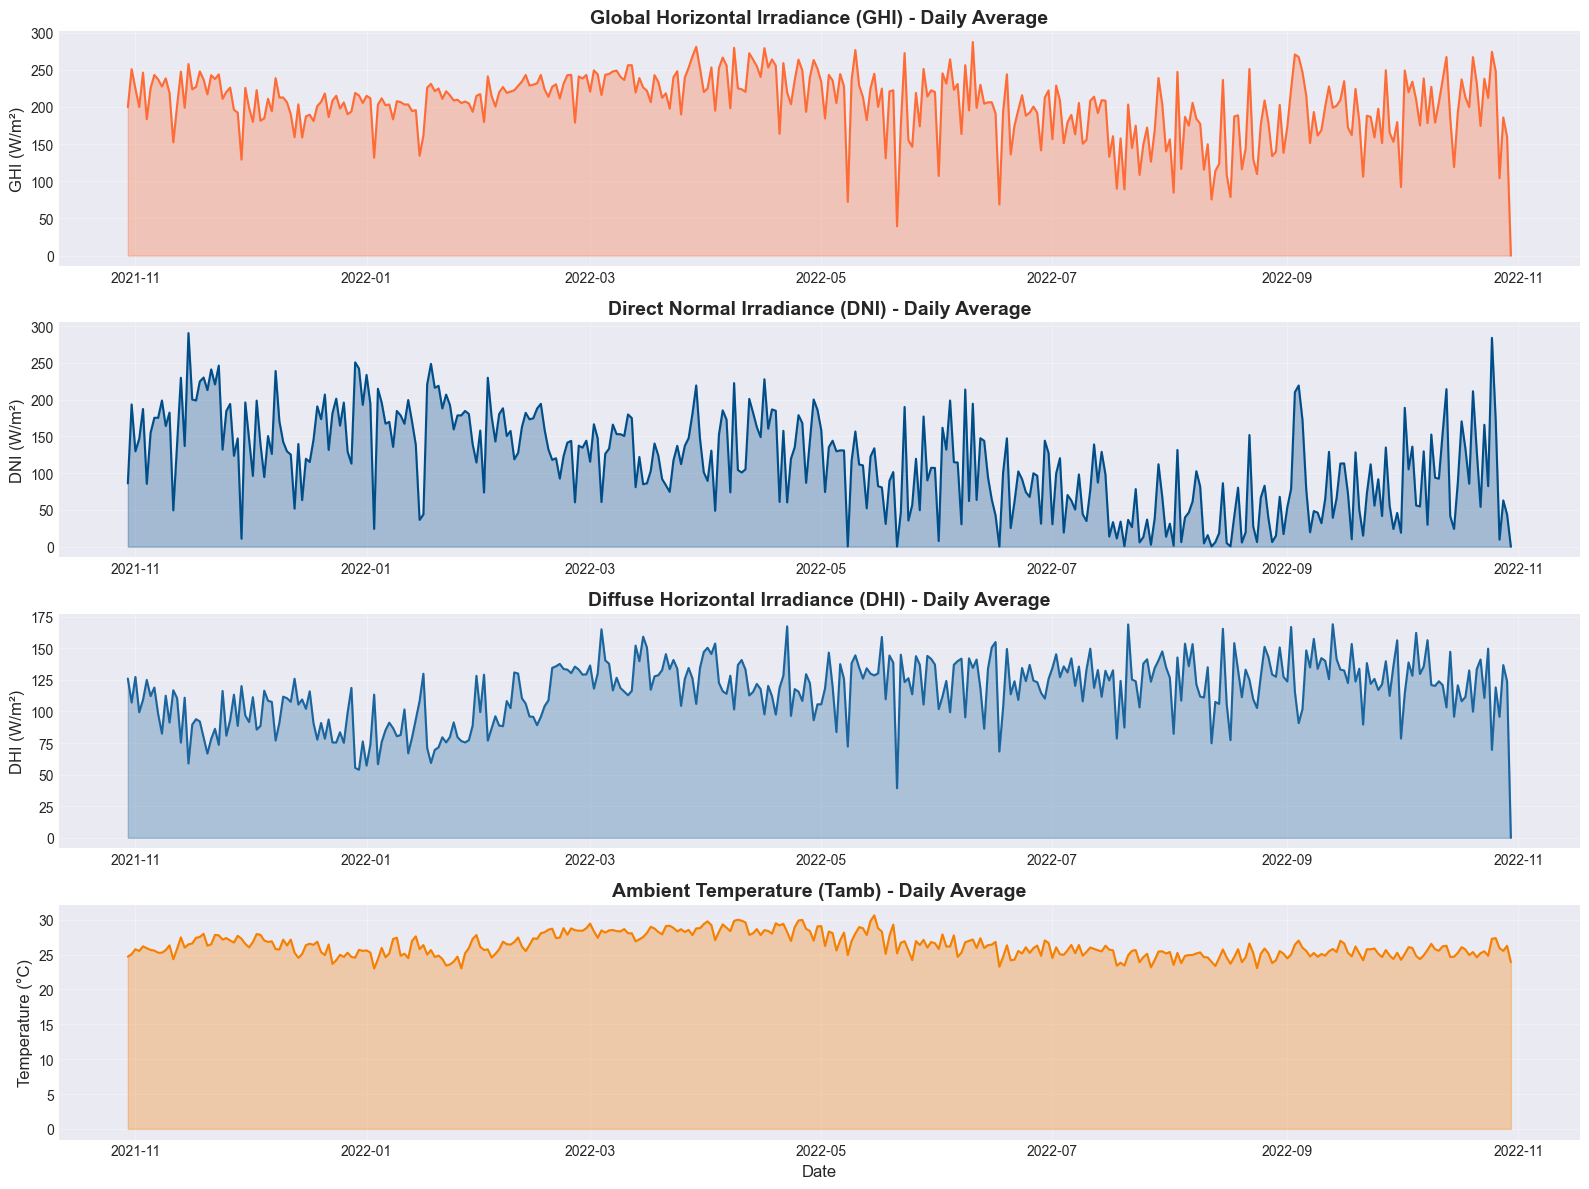

In [10]:
# Resample to daily averages for better visualization
df_daily = df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()

# Plot time series for key variables
fig, axes = plt.subplots(4, 1, figsize=(16, 12))

# GHI
axes[0].plot(df_daily.index, df_daily['GHI'], linewidth=1.5, color='#FF6B35')
axes[0].set_title('Global Horizontal Irradiance (GHI) - Daily Average', fontsize=14, fontweight='bold')
axes[0].set_ylabel('GHI (W/m²)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].fill_between(df_daily.index, df_daily['GHI'], alpha=0.3, color='#FF6B35')

# DNI
axes[1].plot(df_daily.index, df_daily['DNI'], linewidth=1.5, color='#004E89')
axes[1].set_title('Direct Normal Irradiance (DNI) - Daily Average', fontsize=14, fontweight='bold')
axes[1].set_ylabel('DNI (W/m²)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(df_daily.index, df_daily['DNI'], alpha=0.3, color='#004E89')

# DHI
axes[2].plot(df_daily.index, df_daily['DHI'], linewidth=1.5, color='#1A659E')
axes[2].set_title('Diffuse Horizontal Irradiance (DHI) - Daily Average', fontsize=14, fontweight='bold')
axes[2].set_ylabel('DHI (W/m²)', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].fill_between(df_daily.index, df_daily['DHI'], alpha=0.3, color='#1A659E')

# Temperature
axes[3].plot(df_daily.index, df_daily['Tamb'], linewidth=1.5, color='#F77F00')
axes[3].set_title('Ambient Temperature (Tamb) - Daily Average', fontsize=14, fontweight='bold')
axes[3].set_ylabel('Temperature (°C)', fontsize=12)
axes[3].set_xlabel('Date', fontsize=12)
axes[3].grid(True, alpha=0.3)
axes[3].fill_between(df_daily.index, df_daily['Tamb'], alpha=0.3, color='#F77F00')

plt.tight_layout()
plt.show()


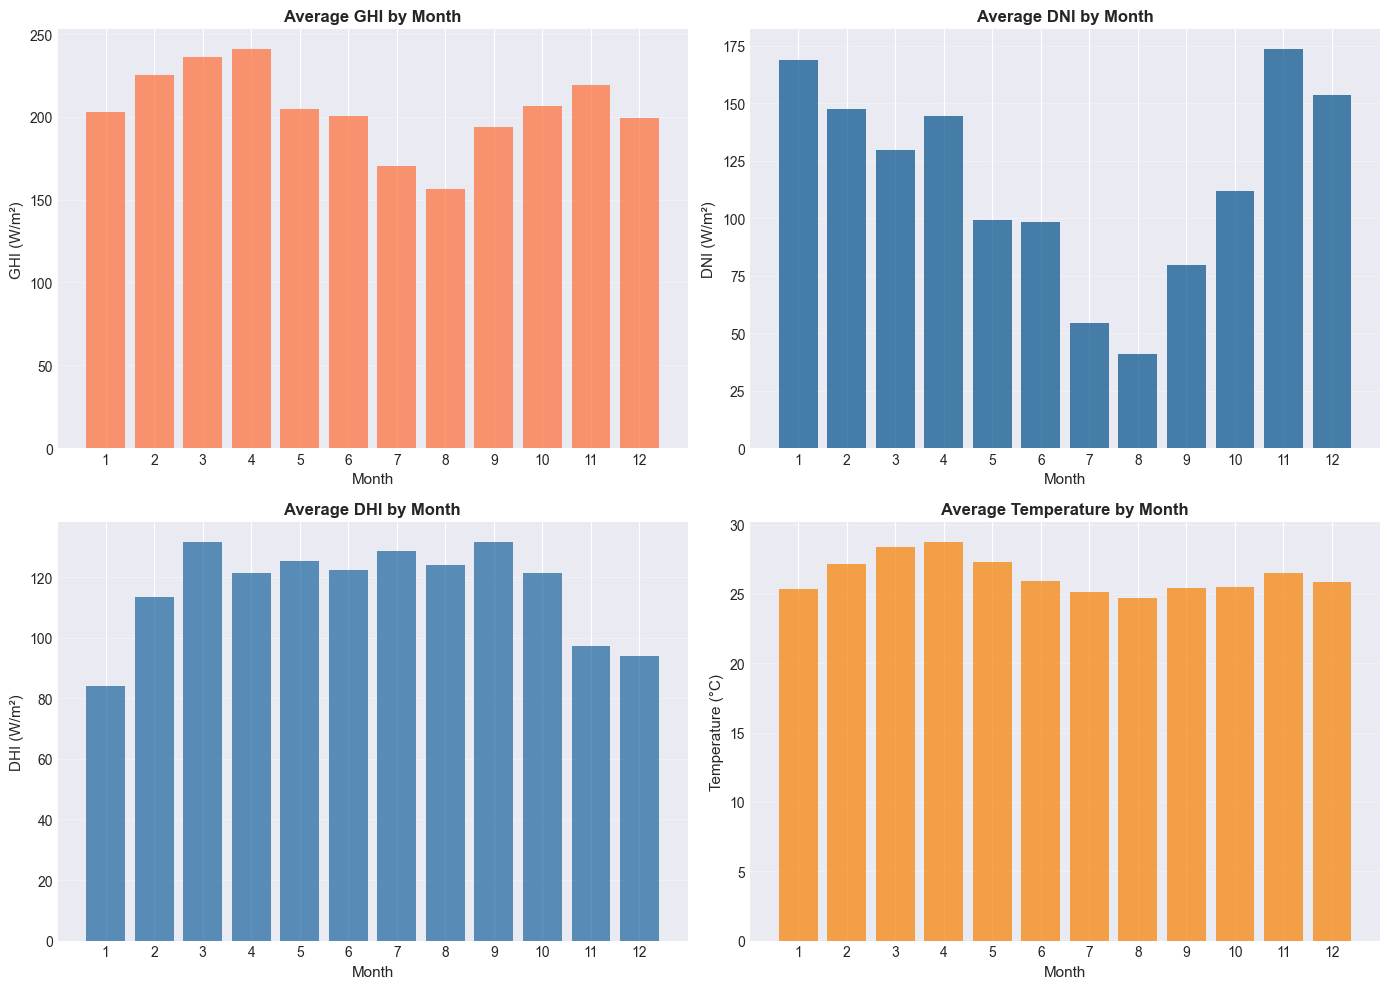

In [11]:
# Monthly patterns
df_clean['Month'] = df_clean.index.month
df_clean['Hour'] = df_clean.index.hour
df_clean['DayOfYear'] = df_clean.index.dayofyear

# Monthly averages
monthly_avg = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Monthly GHI
axes[0, 0].bar(monthly_avg.index, monthly_avg['GHI'], color='#FF6B35', alpha=0.7)
axes[0, 0].set_title('Average GHI by Month', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month', fontsize=11)
axes[0, 0].set_ylabel('GHI (W/m²)', fontsize=11)
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Monthly DNI
axes[0, 1].bar(monthly_avg.index, monthly_avg['DNI'], color='#004E89', alpha=0.7)
axes[0, 1].set_title('Average DNI by Month', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month', fontsize=11)
axes[0, 1].set_ylabel('DNI (W/m²)', fontsize=11)
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Monthly DHI
axes[1, 0].bar(monthly_avg.index, monthly_avg['DHI'], color='#1A659E', alpha=0.7)
axes[1, 0].set_title('Average DHI by Month', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month', fontsize=11)
axes[1, 0].set_ylabel('DHI (W/m²)', fontsize=11)
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Monthly Temperature
axes[1, 1].bar(monthly_avg.index, monthly_avg['Tamb'], color='#F77F00', alpha=0.7)
axes[1, 1].set_title('Average Temperature by Month', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Month', fontsize=11)
axes[1, 1].set_ylabel('Temperature (°C)', fontsize=11)
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


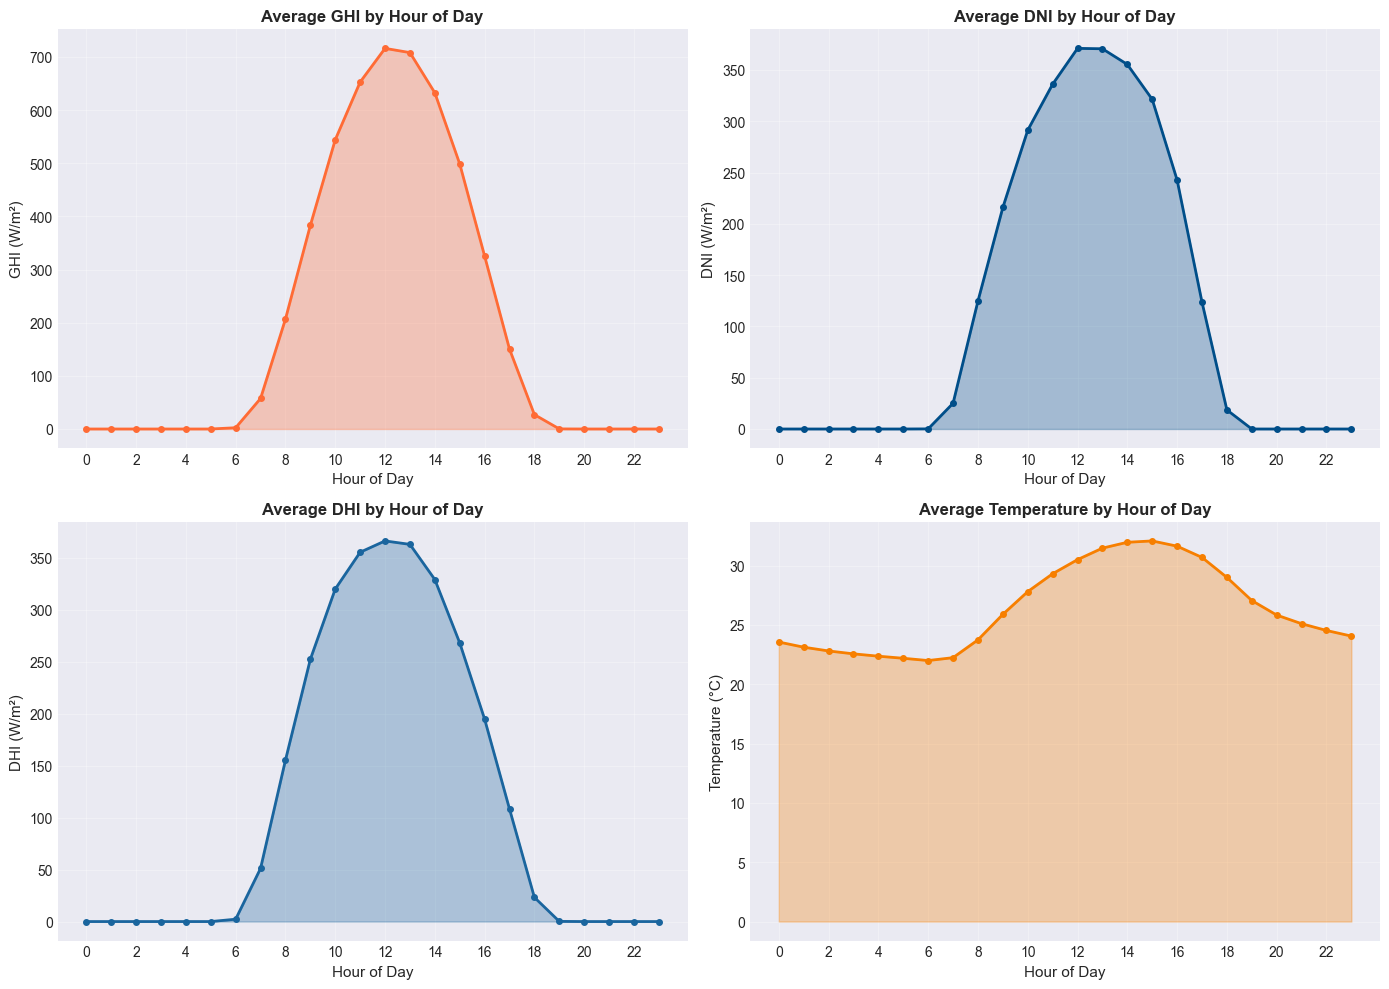

In [12]:
# Hourly patterns (diurnal cycle)
hourly_avg = df_clean.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Hourly GHI
axes[0, 0].plot(hourly_avg.index, hourly_avg['GHI'], marker='o', linewidth=2, color='#FF6B35', markersize=4)
axes[0, 0].set_title('Average GHI by Hour of Day', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Hour of Day', fontsize=11)
axes[0, 0].set_ylabel('GHI (W/m²)', fontsize=11)
axes[0, 0].set_xticks(range(0, 24, 2))
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].fill_between(hourly_avg.index, hourly_avg['GHI'], alpha=0.3, color='#FF6B35')

# Hourly DNI
axes[0, 1].plot(hourly_avg.index, hourly_avg['DNI'], marker='o', linewidth=2, color='#004E89', markersize=4)
axes[0, 1].set_title('Average DNI by Hour of Day', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Hour of Day', fontsize=11)
axes[0, 1].set_ylabel('DNI (W/m²)', fontsize=11)
axes[0, 1].set_xticks(range(0, 24, 2))
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].fill_between(hourly_avg.index, hourly_avg['DNI'], alpha=0.3, color='#004E89')

# Hourly DHI
axes[1, 0].plot(hourly_avg.index, hourly_avg['DHI'], marker='o', linewidth=2, color='#1A659E', markersize=4)
axes[1, 0].set_title('Average DHI by Hour of Day', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Hour of Day', fontsize=11)
axes[1, 0].set_ylabel('DHI (W/m²)', fontsize=11)
axes[1, 0].set_xticks(range(0, 24, 2))
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].fill_between(hourly_avg.index, hourly_avg['DHI'], alpha=0.3, color='#1A659E')

# Hourly Temperature
axes[1, 1].plot(hourly_avg.index, hourly_avg['Tamb'], marker='o', linewidth=2, color='#F77F00', markersize=4)
axes[1, 1].set_title('Average Temperature by Hour of Day', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Hour of Day', fontsize=11)
axes[1, 1].set_ylabel('Temperature (°C)', fontsize=11)
axes[1, 1].set_xticks(range(0, 24, 2))
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].fill_between(hourly_avg.index, hourly_avg['Tamb'], alpha=0.3, color='#F77F00')

plt.tight_layout()
plt.show()


## 4. Cleaning Impact Analysis


Cleaning Impact on Module Readings:
            ModA                    ModB                
            mean     std   count    mean     std   count
Cleaning                                                
0         206.58  300.99  525092  198.04  288.97  525092
1         273.31  164.76     508  277.23  163.55     508


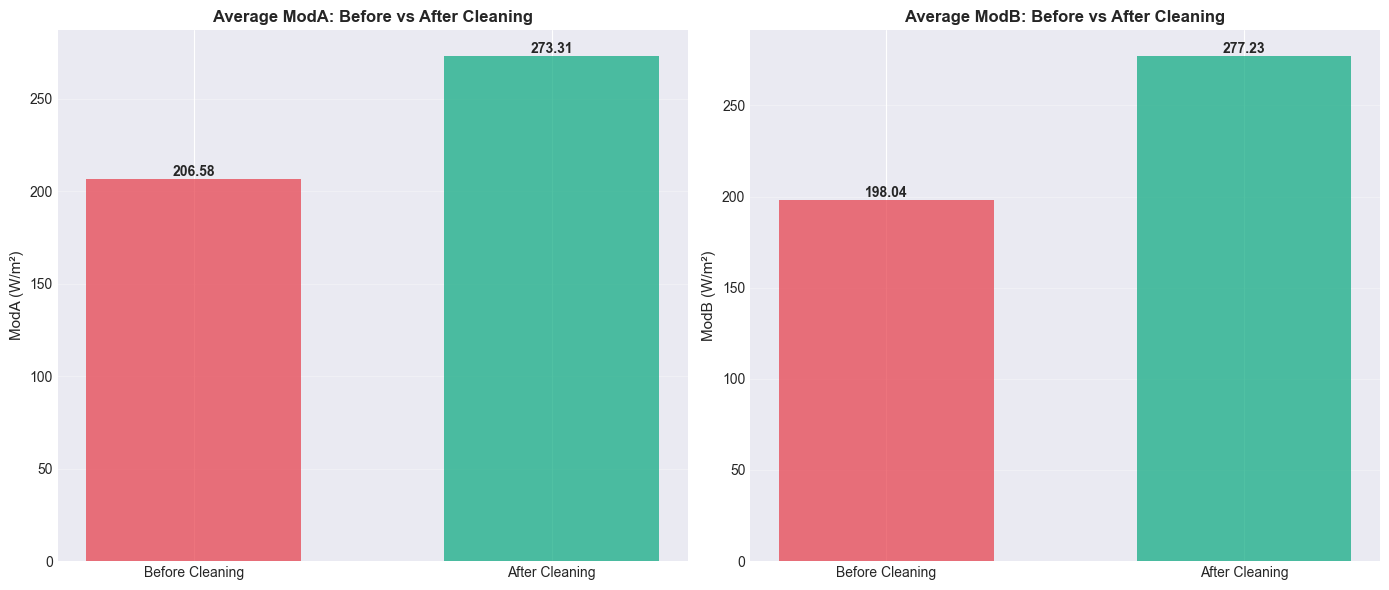


ModA Improvement: 32.30%
ModB Improvement: 39.99%


In [13]:
# Analyze impact of cleaning events on module readings
cleaning_analysis = df_clean.groupby('Cleaning').agg({
    'ModA': ['mean', 'std', 'count'],
    'ModB': ['mean', 'std', 'count']
}).round(2)

print("Cleaning Impact on Module Readings:")
print("=" * 80)
print(cleaning_analysis)

# Visualize cleaning impact
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ModA before and after cleaning
pre_clean_moda = df_clean[df_clean['Cleaning'] == 0]['ModA']
post_clean_moda = df_clean[df_clean['Cleaning'] == 1]['ModA']

axes[0].bar(['Before Cleaning', 'After Cleaning'], 
            [pre_clean_moda.mean(), post_clean_moda.mean()],
            color=['#E63946', '#06A77D'], alpha=0.7, width=0.6)
axes[0].set_title('Average ModA: Before vs After Cleaning', fontsize=12, fontweight='bold')
axes[0].set_ylabel('ModA (W/m²)', fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].text(0, pre_clean_moda.mean(), f'{pre_clean_moda.mean():.2f}', 
             ha='center', va='bottom', fontweight='bold')
axes[0].text(1, post_clean_moda.mean(), f'{post_clean_moda.mean():.2f}', 
             ha='center', va='bottom', fontweight='bold')

# ModB before and after cleaning
pre_clean_modb = df_clean[df_clean['Cleaning'] == 0]['ModB']
post_clean_modb = df_clean[df_clean['Cleaning'] == 1]['ModB']

axes[1].bar(['Before Cleaning', 'After Cleaning'], 
            [pre_clean_modb.mean(), post_clean_modb.mean()],
            color=['#E63946', '#06A77D'], alpha=0.7, width=0.6)
axes[1].set_title('Average ModB: Before vs After Cleaning', fontsize=12, fontweight='bold')
axes[1].set_ylabel('ModB (W/m²)', fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].text(0, pre_clean_modb.mean(), f'{pre_clean_modb.mean():.2f}', 
             ha='center', va='bottom', fontweight='bold')
axes[1].text(1, post_clean_modb.mean(), f'{post_clean_modb.mean():.2f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate improvement percentage
if len(post_clean_moda) > 0 and len(pre_clean_moda) > 0:
    moda_improvement = ((post_clean_moda.mean() - pre_clean_moda.mean()) / pre_clean_moda.mean()) * 100
    modb_improvement = ((post_clean_modb.mean() - pre_clean_modb.mean()) / pre_clean_modb.mean()) * 100
    print(f"\nModA Improvement: {moda_improvement:.2f}%")
    print(f"ModB Improvement: {modb_improvement:.2f}%")


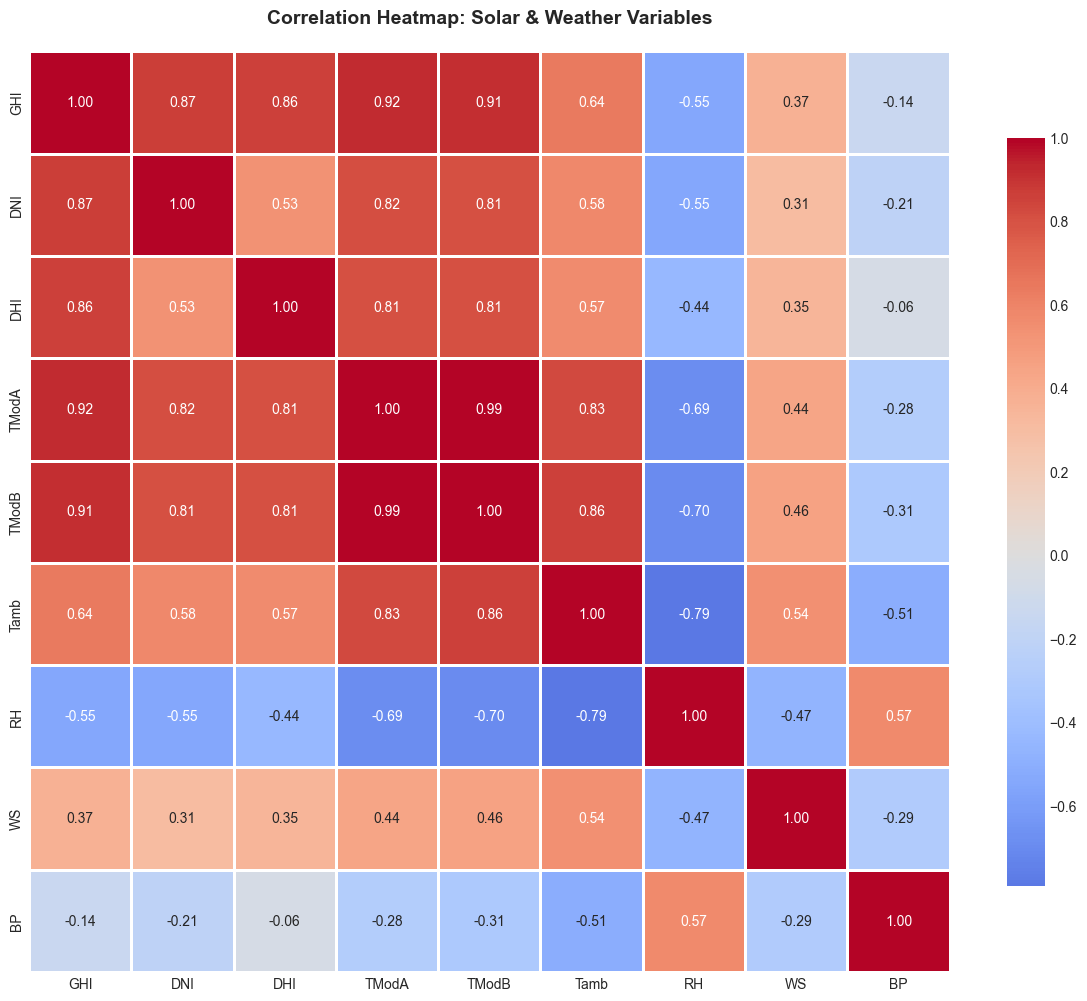


Strong Correlations (|r| > 0.7):
GHI vs DNI: 0.870
GHI vs DHI: 0.864
GHI vs TModA: 0.922
GHI vs TModB: 0.911
DNI vs TModA: 0.816
DNI vs TModB: 0.808
DHI vs TModA: 0.806
DHI vs TModB: 0.805
TModA vs TModB: 0.993
TModA vs Tamb: 0.832
TModB vs Tamb: 0.855
Tamb vs RH: -0.792


In [14]:
# Correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'BP']
corr_matrix = df_clean[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Solar & Weather Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print strong correlations (|r| > 0.7)
print("\nStrong Correlations (|r| > 0.7):")
print("=" * 80)
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"{corr_matrix.columns[i]} vs {corr_matrix.columns[j]}: {corr_val:.3f}")


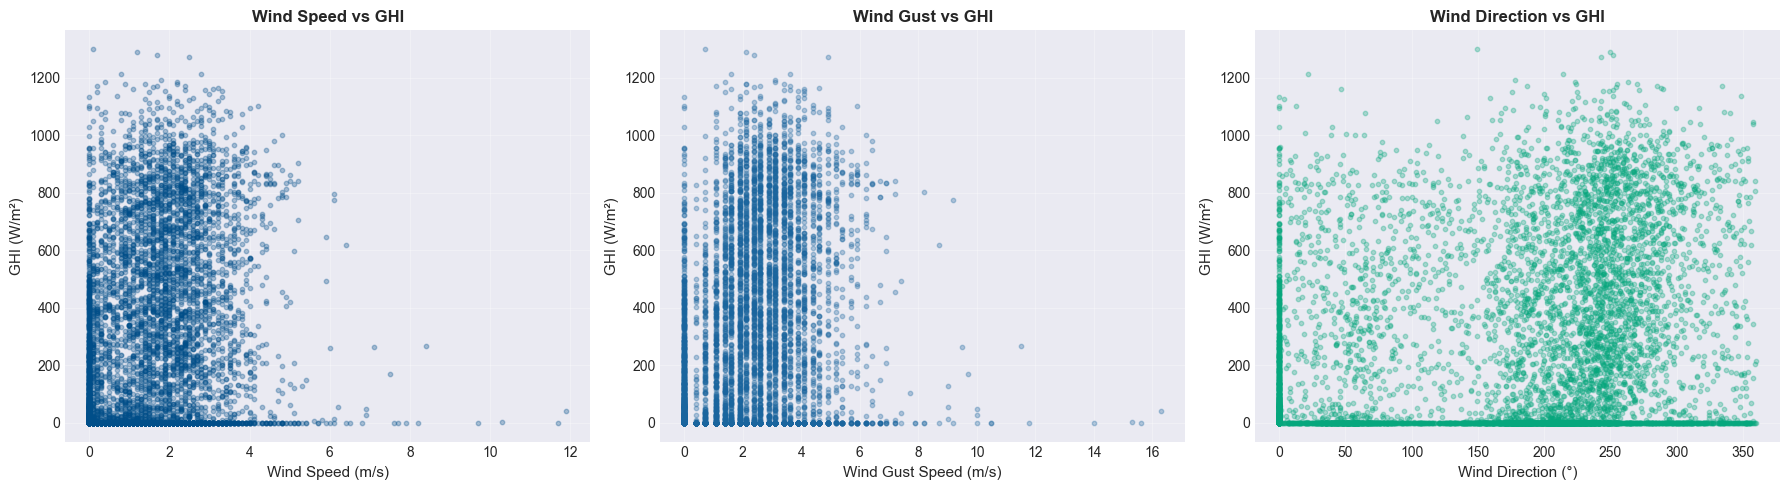

In [15]:
# Scatter plots: Wind vs GHI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# WS vs GHI
sample_data = df_clean.sample(min(10000, len(df_clean)))  # Sample for performance
axes[0].scatter(sample_data['WS'], sample_data['GHI'], alpha=0.3, s=10, color='#004E89')
axes[0].set_xlabel('Wind Speed (m/s)', fontsize=11)
axes[0].set_ylabel('GHI (W/m²)', fontsize=11)
axes[0].set_title('Wind Speed vs GHI', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# WSgust vs GHI
axes[1].scatter(sample_data['WSgust'], sample_data['GHI'], alpha=0.3, s=10, color='#1A659E')
axes[1].set_xlabel('Wind Gust Speed (m/s)', fontsize=11)
axes[1].set_ylabel('GHI (W/m²)', fontsize=11)
axes[1].set_title('Wind Gust vs GHI', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# WD vs GHI
axes[2].scatter(sample_data['WD'], sample_data['GHI'], alpha=0.3, s=10, color='#06A77D')
axes[2].set_xlabel('Wind Direction (°)', fontsize=11)
axes[2].set_ylabel('GHI (W/m²)', fontsize=11)
axes[2].set_title('Wind Direction vs GHI', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


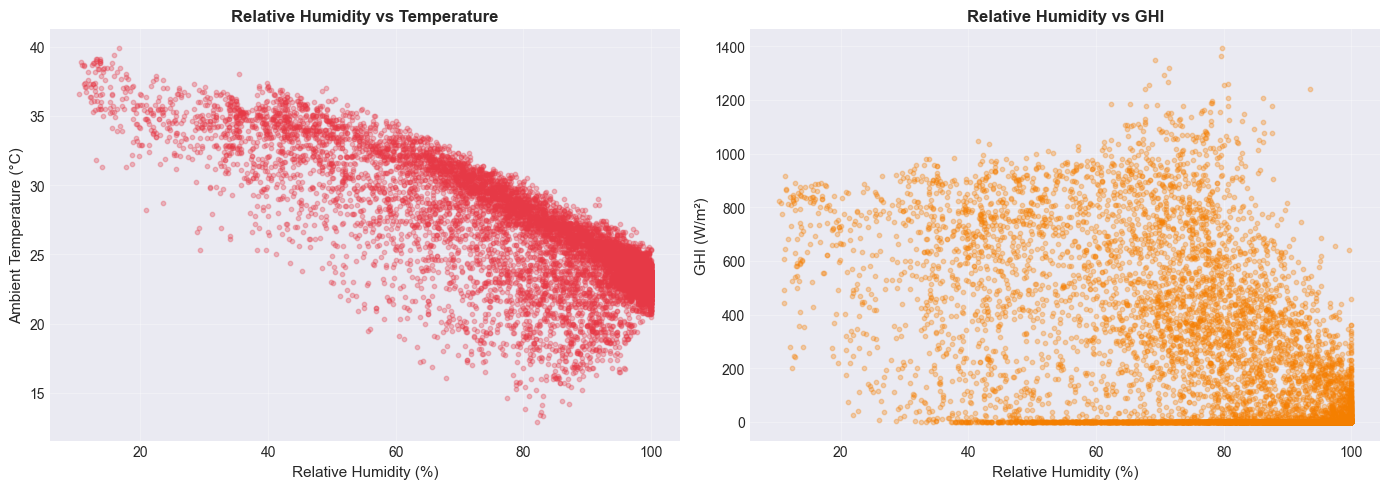

In [16]:
# Scatter plots: RH vs Temperature and RH vs GHI
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RH vs Tamb
sample_data = df_clean.sample(min(10000, len(df_clean)))
axes[0].scatter(sample_data['RH'], sample_data['Tamb'], alpha=0.3, s=10, color='#E63946')
axes[0].set_xlabel('Relative Humidity (%)', fontsize=11)
axes[0].set_ylabel('Ambient Temperature (°C)', fontsize=11)
axes[0].set_title('Relative Humidity vs Temperature', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# RH vs GHI
axes[1].scatter(sample_data['RH'], sample_data['GHI'], alpha=0.3, s=10, color='#F77F00')
axes[1].set_xlabel('Relative Humidity (%)', fontsize=11)
axes[1].set_ylabel('GHI (W/m²)', fontsize=11)
axes[1].set_title('Relative Humidity vs GHI', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Wind & Distribution Analysis


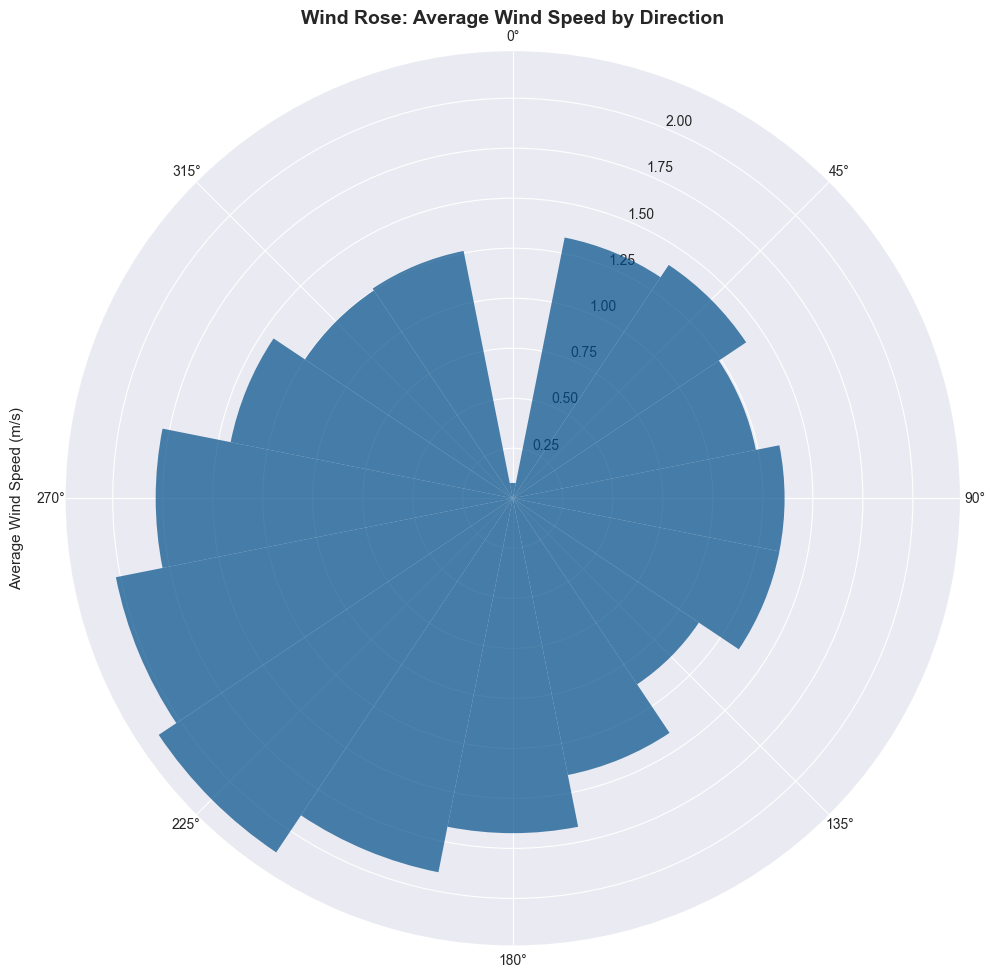

In [17]:
# Wind Rose (Radial bar plot)
# Group wind direction into bins
wind_bins = pd.cut(df_clean['WD'], bins=16, labels=range(16))
wind_rose = df_clean.groupby(wind_bins)['WS'].mean()

# Create wind rose plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

theta = np.linspace(0, 2 * np.pi, 16, endpoint=False)
width = 2 * np.pi / 16

bars = ax.bar(theta, wind_rose.values, width=width, alpha=0.7, color='#004E89')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose: Average Wind Speed by Direction', fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Average Wind Speed (m/s)', fontsize=11, labelpad=30)

plt.tight_layout()
plt.show()


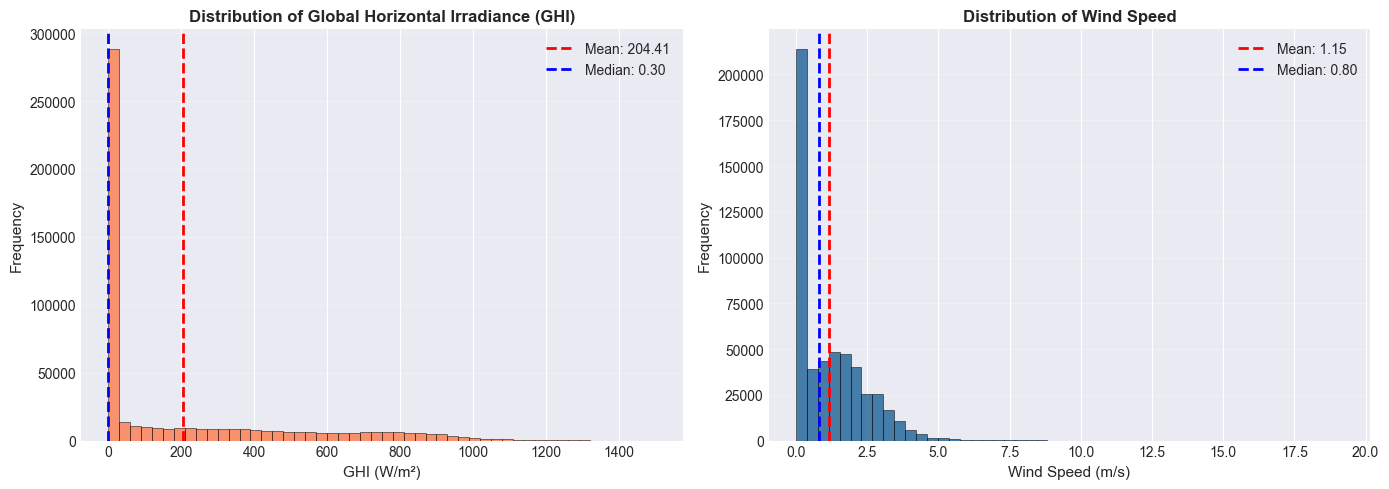

In [18]:
# Histograms for GHI and Wind Speed
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# GHI Histogram
axes[0].hist(df_clean['GHI'], bins=50, color='#FF6B35', alpha=0.7, edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('GHI (W/m²)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Global Horizontal Irradiance (GHI)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].axvline(df_clean['GHI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["GHI"].mean():.2f}')
axes[0].axvline(df_clean['GHI'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df_clean["GHI"].median():.2f}')
axes[0].legend()

# Wind Speed Histogram
axes[1].hist(df_clean['WS'], bins=50, color='#004E89', alpha=0.7, edgecolor='black', linewidth=0.5)
axes[1].set_xlabel('Wind Speed (m/s)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Wind Speed', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].axvline(df_clean['WS'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["WS"].mean():.2f}')
axes[1].axvline(df_clean['WS'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df_clean["WS"].median():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()


## 7. Temperature Analysis


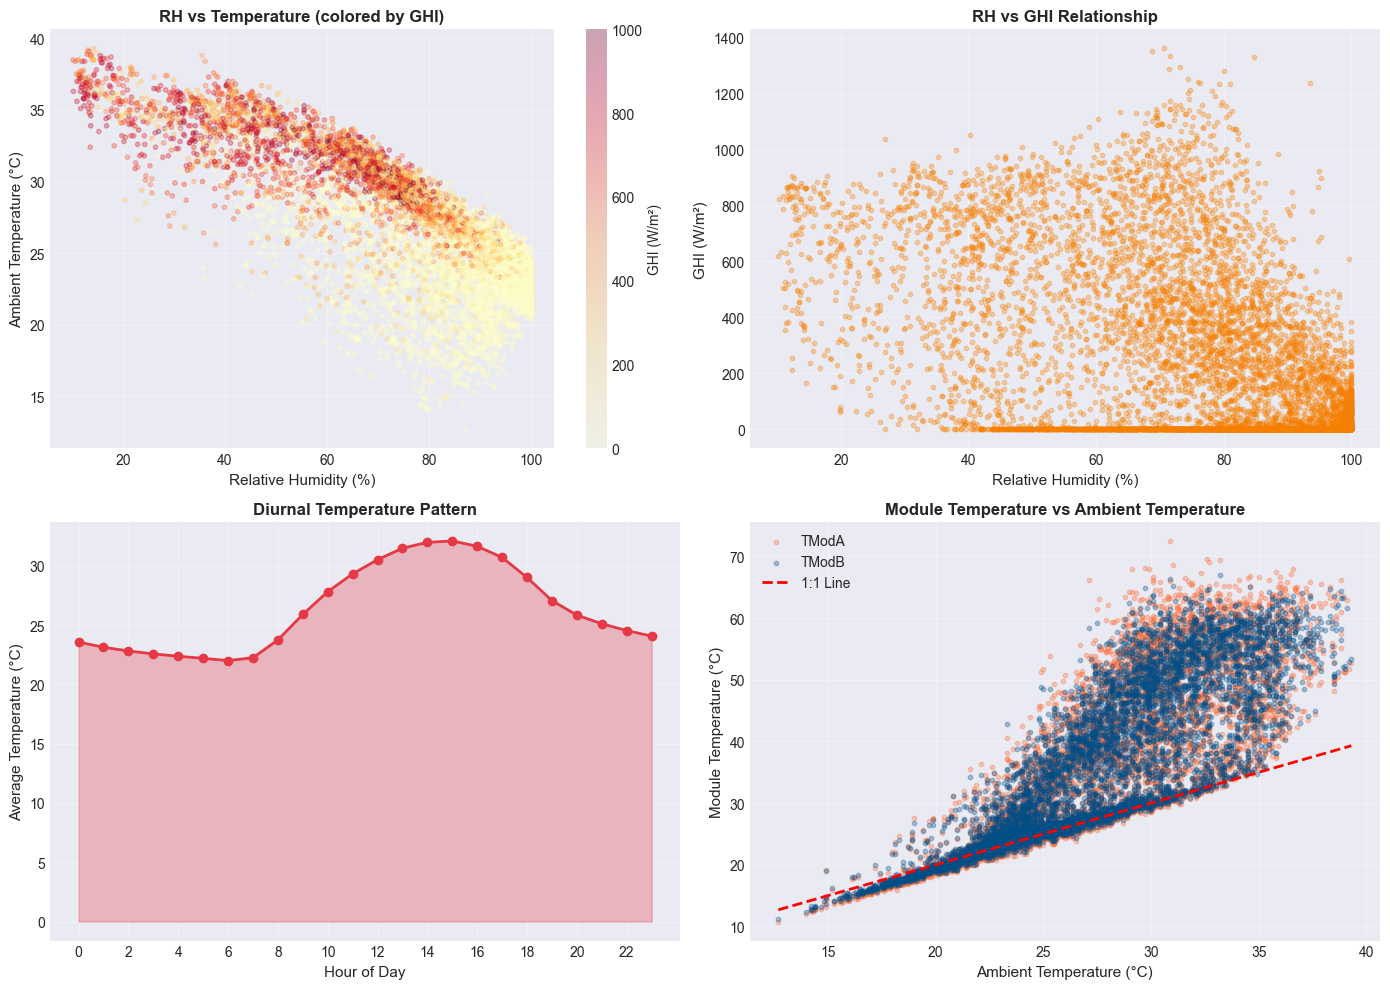

In [19]:
# Temperature and Humidity relationship analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RH vs Tamb scatter with density
sample_data = df_clean.sample(min(10000, len(df_clean)))
axes[0, 0].scatter(sample_data['RH'], sample_data['Tamb'], alpha=0.3, s=10, c=sample_data['GHI'], 
                   cmap='YlOrRd', vmin=0, vmax=1000)
axes[0, 0].set_xlabel('Relative Humidity (%)', fontsize=11)
axes[0, 0].set_ylabel('Ambient Temperature (°C)', fontsize=11)
axes[0, 0].set_title('RH vs Temperature (colored by GHI)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
cbar = plt.colorbar(axes[0, 0].collections[0], ax=axes[0, 0])
cbar.set_label('GHI (W/m²)', fontsize=10)

# RH vs GHI scatter
axes[0, 1].scatter(sample_data['RH'], sample_data['GHI'], alpha=0.3, s=10, color='#F77F00')
axes[0, 1].set_xlabel('Relative Humidity (%)', fontsize=11)
axes[0, 1].set_ylabel('GHI (W/m²)', fontsize=11)
axes[0, 1].set_title('RH vs GHI Relationship', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Temperature distribution by hour
hourly_temp = df_clean.groupby('Hour')['Tamb'].mean()
axes[1, 0].plot(hourly_temp.index, hourly_temp.values, marker='o', linewidth=2, color='#E63946', markersize=6)
axes[1, 0].fill_between(hourly_temp.index, hourly_temp.values, alpha=0.3, color='#E63946')
axes[1, 0].set_xlabel('Hour of Day', fontsize=11)
axes[1, 0].set_ylabel('Average Temperature (°C)', fontsize=11)
axes[1, 0].set_title('Diurnal Temperature Pattern', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(range(0, 24, 2))
axes[1, 0].grid(True, alpha=0.3)

# Module Temperature vs Ambient Temperature
axes[1, 1].scatter(sample_data['Tamb'], sample_data['TModA'], alpha=0.3, s=10, label='TModA', color='#FF6B35')
axes[1, 1].scatter(sample_data['Tamb'], sample_data['TModB'], alpha=0.3, s=10, label='TModB', color='#004E89')
axes[1, 1].plot([sample_data['Tamb'].min(), sample_data['Tamb'].max()], 
                [sample_data['Tamb'].min(), sample_data['Tamb'].max()], 
                'r--', linewidth=2, label='1:1 Line')
axes[1, 1].set_xlabel('Ambient Temperature (°C)', fontsize=11)
axes[1, 1].set_ylabel('Module Temperature (°C)', fontsize=11)
axes[1, 1].set_title('Module Temperature vs Ambient Temperature', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


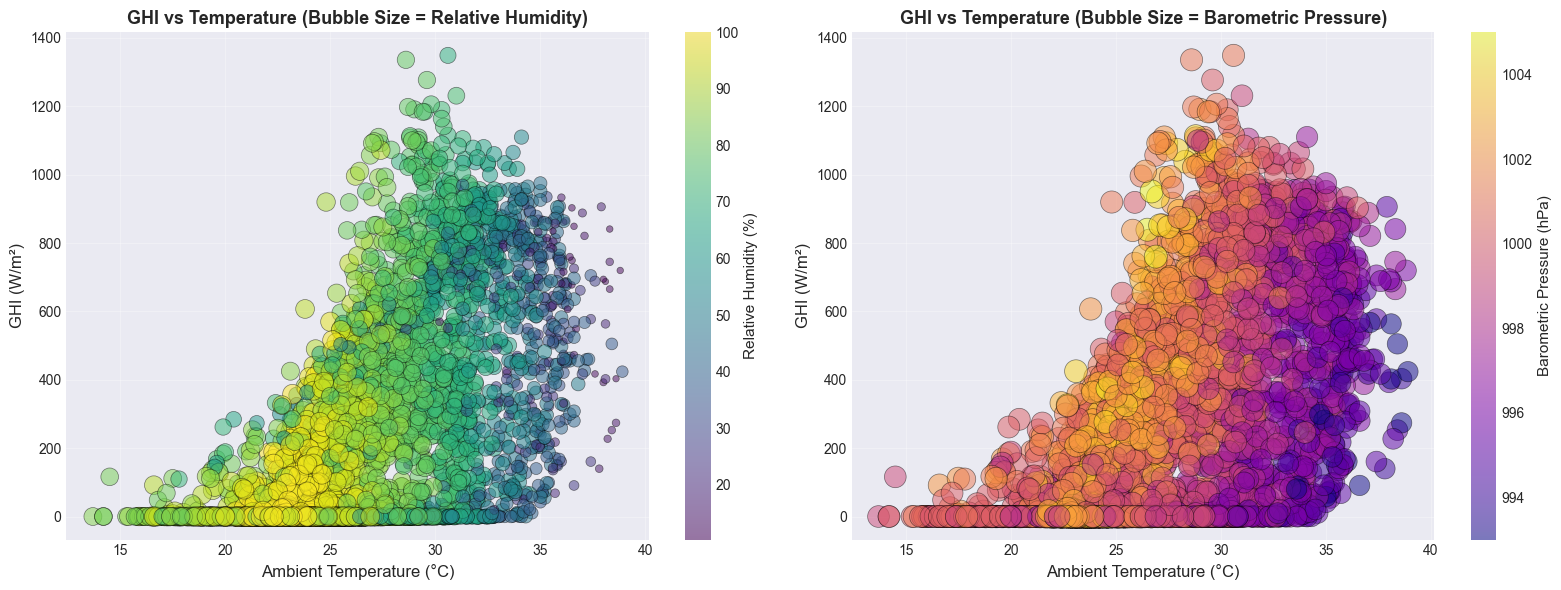

In [20]:
# Bubble chart: GHI vs Tamb with bubble size = RH
sample_data = df_clean.sample(min(5000, len(df_clean)))  # Sample for clarity

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bubble chart with RH as bubble size
scatter1 = axes[0].scatter(sample_data['Tamb'], sample_data['GHI'], 
                          s=sample_data['RH']*2, alpha=0.5, 
                          c=sample_data['RH'], cmap='viridis', edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Ambient Temperature (°C)', fontsize=12)
axes[0].set_ylabel('GHI (W/m²)', fontsize=12)
axes[0].set_title('GHI vs Temperature (Bubble Size = Relative Humidity)', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Relative Humidity (%)', fontsize=11)

# Bubble chart with BP as bubble size
scatter2 = axes[1].scatter(sample_data['Tamb'], sample_data['GHI'], 
                          s=(sample_data['BP']-950)*5, alpha=0.5, 
                          c=sample_data['BP'], cmap='plasma', edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Ambient Temperature (°C)', fontsize=12)
axes[1].set_ylabel('GHI (W/m²)', fontsize=12)
axes[1].set_title('GHI vs Temperature (Bubble Size = Barometric Pressure)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Barometric Pressure (hPa)', fontsize=11)

plt.tight_layout()
plt.show()


## 9. Key Insights & Summary


In [21]:
# Summary statistics for cleaned data
print("=" * 80)
print("FINAL SUMMARY - SIERRA LEONE (BUMBUNA) SOLAR DATA")
print("=" * 80)

print(f"\n📊 Dataset Overview:")
print(f"   • Total records: {len(df_clean):,}")
print(f"   • Date range: {df_clean.index.min().strftime('%Y-%m-%d')} to {df_clean.index.max().strftime('%Y-%m-%d')}")
print(f"   • Time span: {(df_clean.index.max() - df_clean.index.min()).days} days")

print(f"\n☀️  Solar Irradiance Statistics:")
print(f"   • Average GHI: {df_clean['GHI'].mean():.2f} W/m²")
print(f"   • Average DNI: {df_clean['DNI'].mean():.2f} W/m²")
print(f"   • Average DHI: {df_clean['DHI'].mean():.2f} W/m²")
print(f"   • Peak GHI: {df_clean['GHI'].max():.2f} W/m²")

print(f"\n🌡️  Weather Statistics:")
print(f"   • Average Temperature: {df_clean['Tamb'].mean():.2f} °C")
print(f"   • Average Relative Humidity: {df_clean['RH'].mean():.2f} %")
print(f"   • Average Wind Speed: {df_clean['WS'].mean():.2f} m/s")
print(f"   • Average Barometric Pressure: {df_clean['BP'].mean():.2f} hPa")

print(f"\n🔍 Data Quality:")
print(f"   • Missing values after cleaning: {df_clean.isna().sum().sum()}")
print(f"   • Outliers flagged (|Z| > 3): {outlier_flags.sum():,} ({outlier_flags.sum()/len(df_clean)*100:.2f}%)")
print(f"   • Cleaning events: {df_clean['Cleaning'].sum():,}")

print(f"\n📈 Key Relationships:")
corr_ghi_tamb = df_clean['GHI'].corr(df_clean['Tamb'])
corr_ghi_rh = df_clean['GHI'].corr(df_clean['RH'])
corr_ghi_ws = df_clean['GHI'].corr(df_clean['WS'])
print(f"   • GHI vs Temperature correlation: {corr_ghi_tamb:.3f}")
print(f"   • GHI vs Relative Humidity correlation: {corr_ghi_rh:.3f}")
print(f"   • GHI vs Wind Speed correlation: {corr_ghi_ws:.3f}")

print("\n" + "=" * 80)


FINAL SUMMARY - SIERRA LEONE (BUMBUNA) SOLAR DATA

📊 Dataset Overview:
   • Total records: 525,600
   • Date range: 2021-10-30 to 2022-10-30
   • Time span: 364 days

☀️  Solar Irradiance Statistics:
   • Average GHI: 204.41 W/m²
   • Average DNI: 116.52 W/m²
   • Average DHI: 116.27 W/m²
   • Peak GHI: 1499.00 W/m²

🌡️  Weather Statistics:
   • Average Temperature: 26.32 °C
   • Average Relative Humidity: 79.45 %
   • Average Wind Speed: 1.15 m/s
   • Average Barometric Pressure: 999.88 hPa

🔍 Data Quality:
   • Missing values after cleaning: 525600
   • Outliers flagged (|Z| > 3): 16,292 (3.10%)
   • Cleaning events: 508

📈 Key Relationships:
   • GHI vs Temperature correlation: 0.640
   • GHI vs Relative Humidity correlation: -0.549
   • GHI vs Wind Speed correlation: 0.371



## 10. Export Cleaned Data


In [22]:
# Reset index to include Timestamp as a column for export
df_export = df_clean.reset_index()

# Export cleaned data
output_path = 'data/sierraleone_clean.csv'
print(f"Exporting cleaned data to: {os.path.abspath(output_path)}")
df_export.to_csv(output_path, index=False)

print(f"✅ Cleaned data exported to: {output_path}")
print(f"   • Shape: {df_export.shape}")
print(f"   • Columns: {len(df_export.columns)}")
print(f"   • File size: {pd.io.common.file_size(output_path) if hasattr(pd.io.common, 'file_size') else 'N/A'}")


Exporting cleaned data to: d:\My Projects\Kifiya AI Mastery Training\data\sierraleone_clean.csv
✅ Cleaned data exported to: data/sierraleone_clean.csv
   • Shape: (525600, 22)
   • Columns: 22
   • File size: N/A
